# Linear Regression

## Basics
linear regression is a linear approach for modelling the relationship between a scalar response $y$ (dependent variable) and a set of independent variables $\{x_1, \dots, x_p\}$.

$$
y = \sum_{i=1}^p \beta_i x_i + \beta_0 + \varepsilon, \quad \varepsilon \overset{i.i.d.}{\sim} \mathcal{N}(0,\sigma^2), 
$$

$\beta_0$ is called bias/intercept, other $\beta_i$'s are coefficients. This relationship is modeled through an error variable $\varepsilon$ — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. 

### Matrix Form
The goal is to learn $\beta_i$'s from $n$ samples of pair $\{\mathbf{x}_j, y_j\}_{j=1}^n$, by assuming

$$
y_j =  \mathbf{x}_j^\top \boldsymbol\beta + \varepsilon_j, \quad j = 1, \dots, n
$$

with $\mathbf{x}_j=(1, x_{j,1}, \dots, x_{j,p})^\top\in\mathbb{R}^{p+1}$, $\boldsymbol\beta = (\beta_0, \beta_1,\dots, \beta_p)^\top\in\mathbb{R}^{p+1}$. $x_{j,1}, \dots, x_{j,p}$ are the $p$ features of the $j$-th sample.

Stack the $n$ equations together and write in matrix notation as

$$
\mathbf{y} = \mathbf{X} \boldsymbol\beta + \boldsymbol\varepsilon
$$

where $\mathbf{y} = (y_1,\dots,y_n)^\top$, $\mathbf{X} = (\mathbf{x}_1, \dots, \mathbf{x}_n)^\top\in\mathbb{R}^{n\times (p+1)}$. Each row of $\mathbf{X}$ represents a sample $\mathbf{x}_j^\top$.


### Least Squares Estimation

$$
\boldsymbol\beta^* = \arg\min_{\boldsymbol\beta\in\mathbb{R}^{p+1}} \; L(\boldsymbol\beta) :=
\|\mathbf{X} \boldsymbol\beta - \mathbf{y} \|^2 = \sum_{j=1}^n \; (\mathbf{x}_j^\top \boldsymbol\beta  - y_j)^2
$$

Closed-form solution by setting 
$\nabla L(\boldsymbol\beta^*) = \mathbf{X}^\top(\mathbf{X} \boldsymbol\beta^* - \mathbf{y}) = \mathbf{0}$, then

$$
\boldsymbol\beta^* = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

#### Prediction 
For any sample $\mathbf{x} = (1, x_1,\dots, x_p)^\top$, the prediction is

$$
\hat{y} =  \mathbf{x}^\top \boldsymbol\beta^*
$$

For a set of $N$ samples with data matrix $\mathbf{X}$, the predictions are

$$
\hat{\mathbf{y}} =  \mathbf{X} \boldsymbol\beta^*
$$

#### Mean Squared Error

Mean Squared Error (MSE) measures the discrepancy between true respose $\mathbf{y}$ and the predicted vaules $\hat{\mathbf{y}}$:

$$
\mbox{MSE}\, (\hat{\mathbf{y}}, \mathbf{y}) 
= \frac{1}{N} \sum_{i=1}^N \, (\hat{y}_i - y_i)^2
$$

### Regularization Variants

#### Ridge Regression 
$$
\min_{\boldsymbol\beta\in\mathbb{R}^{p+1}} \; \frac{1}{2}\|\mathbf{X} \boldsymbol\beta - \mathbf{y} \|^2 + \lambda \|\boldsymbol\beta\|^2
$$
with the closed-form solution:

$$
\boldsymbol\beta^* = (\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}
$$

#### LASSO Regression

[LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) (least absolute shrinkage and selection operator) is famous for feature selection, as $\ell_1$ penalty yeilds **sparse** $\boldsymbol\beta$ solution:

$$
\min_{\boldsymbol\beta\in\mathbb{R}^{p+1}} \; \frac{1}{2}\|\mathbf{X} \boldsymbol\beta - \mathbf{y} \|^2 + \lambda \|\boldsymbol\beta\|_1
$$
with no closed-form solution.

With increasing value of $\lambda$ which means increasing regularization strength, the absolute values of weights would need to decrease (shrink) to keep the overall value of loss function minimized. The optimization of LASSO loss function results in some of the weights becoming zero and hence can be seen as method of selection of the features. Pay attention to usage of words, shrinkage, selection and absolute. This is why LASSO is termed as Least absolute shrinkage and selection operator.

## Implementation with Python

We implement linear regression with Python and create a class of model called `LinearReg`. Resembling ``sklearn``, we also add object-oriented methods such as ``fit`` and ``predict``.

**Underscore before the function name is how we declare a method to be private in Python**

In [1]:
class LinearReg():
    
    def __init__(self):       
        self.params = []
        
        
    def fit(self, X, y):  
        if len(X.shape) == 1: # if X is 1D array, convert X into 2D array
            X  = self._reshape_x(X)   
        X = self._concatenate_ones(X)
        self.params = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
        
    def predict(self, X):
        bias = self.params[0]
        coeff = self.params[1:]
        y_preds = []
            
        for x in X:
            y_preds.append(x.dot(coeff) + bias)
            
        return y_preds
    
    def mse(self, y_preds, y):
        return np.mean((y-y_preds)**2)
        
    def mae(self, y_preds, y):
        return np.mean(np.abs(y-y_preds))
    
    def rmse(self, y_preds, y):
        return np.sqrt(self.mse(y_preds, y))
        
    def _reshape_x(self, X):
        return X.reshape(-1,1) 
    
    def _concatenate_ones(self, X):
        ones = np.ones(shape=X.shape[0]).reshape(-1,1)
        return np.concatenate((ones, X), axis = 1)

## California Housing Dataset
The California Housing Dataset is a ``sklearn`` built-in dataset. It is a derived from information collected by the 1990 U.S. Census Service concerning median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). 

Attribute Information:

 - MedInc:        median income in block group
 - HouseAge:      median house age in block group
 - AveRooms:      average number of rooms per household
 - AveBedrms:     average number of bedrooms per household
 - Population:    block group population
 - AveOccup:      average number of household members
 - Latitude:      block group latitude
 - Longitude:     block group longitude



### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.keys())
print()
print(housing.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

(20640, 8)


In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
import pandas as pd

X = pd.DataFrame(housing.data)
X.columns = housing.feature_names

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
print(X.shape)

(20640, 8)


In [10]:
y = pd.DataFrame(housing.target, columns = ['Price'])
y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [11]:
print(y.shape)

(20640, 1)


Concatenate ``X`` and ``y`` to print out the complete dataset.

In [12]:
data = pd.concat([X,y], axis = 1)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
print(data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


### Visualization

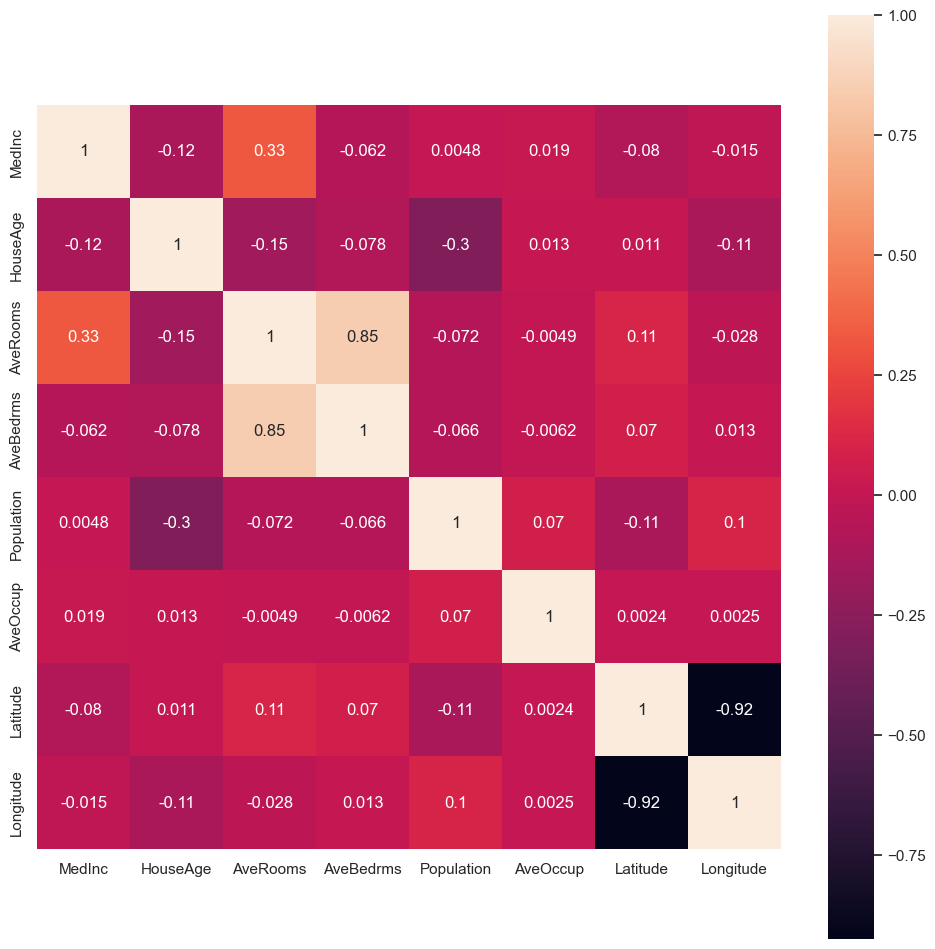

In [15]:
# correlation matrix of features
plt.figure(figsize = (12,12))
ax = sns.heatmap(X.corr(),annot=True)
ax.set_aspect("equal")

In [16]:
# X.drop(['Latitude','Longitude'], axis = 1, inplace = True)

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<Axes: ylabel='Count'>

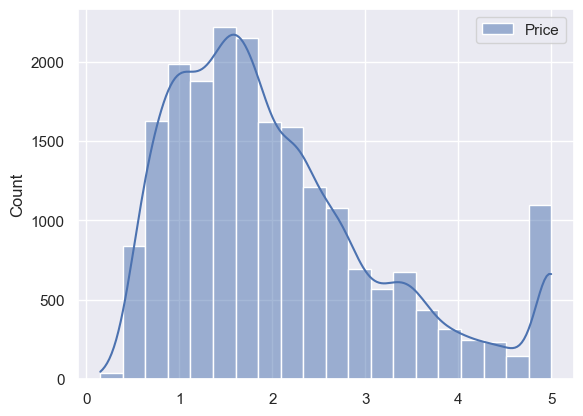

In [18]:
# distribution plot
sns.histplot(y, bins = 20, kde = True)

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [19]:
# import module to split the data
from sklearn.model_selection import train_test_split
# X - argument relates to the features
# y - argument relates to the labels
# test_size - 20% of dataset is used for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**The data is stored in DataFrames**

In [20]:
print(type(X_train))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(16512, 8) (16512, 1)
(4128, 8) (4128, 1)


## 1. Our Own Implementation 

In [21]:
class LinearReg(object):
    def __init__(self, lam = 0.1):
        self.params = []
        # self.lam = float(lam)
        
    def fit(self, X, y):
        if len(X.shape) == 1: # if X is 1D array, convert X into 2D array
            X  = self._reshape_x(X) 
        X = self._concatenate_ones(X)
        m = X.shape[1]
        self.params = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
        # self.params = np.linalg.inv(X.T.dot(X) + self.lam*np.eye(m)).dot(X.T).dot(y)
        
    def predict(self, X):
        bias = self.params[0]
        coeff = self.params[1:]
        y_preds = []
            
        for x in X:
            y_preds.append(x.dot(coeff) + bias)
            
        return y_preds
    
    def mse(self, y_preds, y):
        return np.mean((y-y_preds)**2)
    
    def mae(self, y_preds, y):
        return np.mean(np.abs(y-y_preds))
    
    def rmse(self, y_preds, y):
        return np.sqrt(self.mse(y_preds, y))
      
    def _reshape_x(self, X):
        return X.reshape(-1,1) 
    
    
    def _concatenate_ones(self, X):
        ones = np.ones(shape=X.shape[0]).reshape(-1,1)
        return np.concatenate((ones, X), axis = 1)

**Convert dataframes into numpy arrays**

In [22]:
X_tr, y_tr = np.array(X_train), np.array(y_train)
X_te, y_te = np.array(X_test), np.array(y_test)

**Fit the model**

In [23]:
ols = LinearReg()
ols.fit(X_tr, y_tr)

In [24]:
ols.params

array([[-3.64153551e+01],
       [ 4.35942782e-01],
       [ 9.66161365e-03],
       [-1.07190554e-01],
       [ 6.04821496e-01],
       [-4.34745213e-06],
       [-4.10947310e-03],
       [-4.15463799e-01],
       [-4.28700232e-01]])

**Make predictions for test set**

In [25]:
y_preds = ols.predict(X_te)
print(y_preds[0])
print(y_te[0])

[3.14285047]
[4.062]


###  Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [26]:
print('Mean Absolute Error on test set is', ols.mae(y_preds, y_te))
print('Mean Squared Error on test set is', ols.mse(y_preds, y_te))
print('Root Mean Squared Error on test set is', ols.rmse(y_preds, y_te))

Mean Absolute Error on test set is 0.5379335579314333
Mean Squared Error on test set is 0.54467759968451
Root Mean Squared Error on test set is 0.7380227636628223


## 2. Linear Regression with Scikit-learn 

In [27]:
# import module for linear regression
from sklearn.linear_model import LinearRegression

In [28]:
# create a linear regression object
lm = LinearRegression()

In [29]:
# fit the model using training dataset
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [30]:
# print the intercept
print(lm.intercept_)

[-36.41535508]


In [31]:
print(lm.coef_)

[[ 4.35942782e-01  9.66161365e-03 -1.07190554e-01  6.04821496e-01
  -4.34745213e-06 -4.10947310e-03 -4.15463799e-01 -4.28700232e-01]]


In [32]:
# create a dataframe to evaluate coeff
coeff_df = pd.DataFrame(data = lm.coef_.T, index = X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MedInc,0.435943
HouseAge,0.009662
AveRooms,-0.107191
AveBedrms,0.604821
Population,-0.000004
AveOccup,-0.004109
Latitude,-0.415464
Longitude,-0.428700


Interpreting the coefficients:


- Holding all other features fixed, a 1 unit increase in **MedInc** is associated with an **increase of \$43,594**.
- Holding all other features fixed, a 1 unit increase in **HouseAge** is associated with an **increase of \$966**.
- Holding all other features fixed, a 1 unit increase in **AveRooms** is associated with an **decrease of \$10,719**.
- Holding all other features fixed, a 1 unit increase in **AveBedrms** is associated with an **increase of \$60,482**.
- ...

In [33]:
lm.score(X_test,y_test)

0.5970946680312594

In [34]:
predictions = lm.predict(X_test)

In [35]:
feature = X_test.iloc[[0]]
prediction = lm.predict(feature)
print(feature)
print()
print(prediction[0])
print(y_test.iloc[0])

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
16086  5.6204      36.0  6.110738   0.979866       742.0  2.489933     37.73   

       Longitude  
16086    -122.49  

[3.14285047]
Price    4.062
Name: 16086, dtype: float64


(np.float64(-0.09251099999999998),
 np.float64(5.2425109999999995),
 np.float64(-0.7436855546672494),
 np.float64(7.557099505033865))

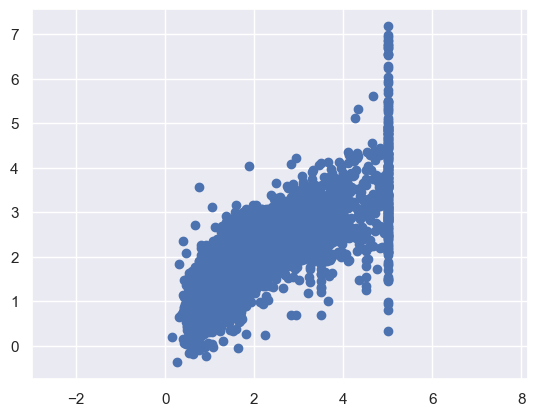

In [36]:
plt.scatter(y_test,predictions)
plt.axis('equal')

**Residual Histogram**

The residuals are not perfectly normal distributed

<Axes: ylabel='Count'>

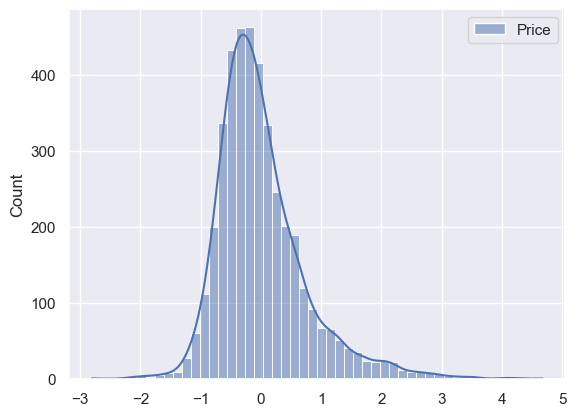

In [37]:
sns.histplot((y_test-predictions),bins=50, kde = True)

In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5379335579317638
MSE: 0.5446775996844714
RMSE: 0.7380227636627961


## LASSO Regression

In LASSO, we need to choose the hyperparameter ``alpha`` for controlling the stength of regularization.

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.1) # alpha is the regularziation parameter
#
# Fit the Lasso model
#
lasso.fit(X_train, y_train)
#
# Create the model score
#
lasso.score(X_test, y_test)

0.5316335925300483

In [41]:
prediction = lasso.predict(feature)
print()
print(prediction[0])
print(y_test.iloc[0])


2.9032024533773457
Price    4.062
Name: 16086, dtype: float64


Once the model is fit, one can look into the coefficients by printing ``lasso.coef_`` command. It will be interesting to find that some of the coefficients value is found to be zero.

In [42]:
coeff_df = pd.DataFrame(data = lasso.coef_.T, index = X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MedInc,0.390794
HouseAge,0.015525
AveRooms,-0.000000
AveBedrms,0.000000
Population,0.000021
AveOccup,-0.003755
Latitude,-0.114086
Longitude,-0.099355


### LASSO Regression Crossvalidation 

We could use cross-validation technique with LASSO regression. 

* ``sklearn.linear_model.LassoCV`` is used as Lasso regression cross validation implementation.

* ``LassoCV`` takes one of the parameter input as ``cv`` which represents number of folds to be considered while applying cross-validation. In the example below, the value of ``cv`` is set to 5.

* Entire dataset is used for training and testing purpose. This is unlike the 2-way or 3-way holdout method where the model is trained and tested on different data split.

* The model performance of ``LassoCV`` model is found to be greater than the Lasso regression algorithm.


In [43]:
from sklearn.linear_model import LassoCV

# Create an instance of Lasso Regression implementation
#
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(np.array(X), np.array(y).ravel())
#
# Create the model score, the coefficient of determination of the prediction.
#
lasso_cv.score(X, y)

/Users/penghangyin/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


0.5902088471774516

In [44]:
coeff_df = pd.DataFrame(data = lasso_cv.coef_.T, index = X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MedInc,0.381486
HouseAge,0.011287
AveRooms,0.002204
AveBedrms,0.000000
Population,0.000002
AveOccup,-0.003513
Latitude,-0.339002
Longitude,-0.339457


## Exercise
Modify the Python code for ``LinearReg`` class so that it solves ridge regression problems.

In [ ]:
model = LinearReg(alpha= 0.1)